In [7]:
from RestrictedBoltzmanMachine import RestrictedBoltzmanMachine, sigmoid
import matplotlib.pyplot as plt
import pandas as pd
import cPickle
import numpy as np
from hinton import hinton
%matplotlib inline

In [4]:
class RecipesRestrictedBoltzmanMachine(RestrictedBoltzmanMachine):
    """
    Special version of the vanilla RBM suitable for recipe recommendation
    """
    def __init__(self, ingredients, regions, categories, n_hidden):
        self.ingredients = ingredients
        self.regions = regions
        n_visible = len(ingredients) + len(regions)
        self._bias_visible = np.random.randn(n_visible, 1) / 100
        self._bias_hidden = np.random.randn(n_hidden, 1) / 100
        self._weights = np.random.randn(n_visible, n_hidden) / 100
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.ingredient_hash = {ingr : i for i, ingr in enumerate(ingredients)}
        self.region_hash = {reg : i + len(ingredients) for i, reg in enumerate(regions)}
        self.categories = categories
    
    def recommend_ingredients(self, recipe, top_size=5, region=None, category=None):
        """
        For a given recipe, recommend ingredients that might match
        Optionally, region of the recipe can be fixed as can the category
        to select ingredients from
        """
        n_ingredients = len(self.ingredients)
        # calculate hidden activations
        # without regions
        activation_hidden = self._bias_hidden +\
                    self._weights[[self.ingredient_hash[ingr] for\
                                   ingr in recipe]].sum(0).reshape(-1,1)
        # if regions are included: update activations
        if region is not None:
            activation_hidden += self._weights[[self.region_hash[region]]].reshape(-1,1)
        # transform to probabilities
        p_hidden = sigmoid(activation_hidden)
        # use hidden actions to reconstruct recipe
        p_visible_reconstructed = list(sigmoid((np.dot(self._weights, p_hidden) +\
                                                self._bias_visible).ravel()))
        # recommend ingredients
        recommendations = [(p, ingr, cat) for p, ingr, cat\
                            in zip(p_visible_reconstructed[:n_ingredients],
                                self.ingredients, self.categories) if ingr not in recipe] 
        if category is not None:
            recommendations = [tup for tup in recommendations if tup[2] == category]
        recommendations.sort()
        return recommendations[::-1][:top_size]
        
            

In [23]:
recipes = pd.DataFrame.from_csv('Recipes_with_origin.csv')
recipes.head()

,almond,angelica,anise,anise seed,apple,apple brandy,armagnac,apricot,artemisia,artichoke,...,EastAsian,EasternEuropean,LatinAmerican,MiddleEastern,NorthAmerican,NorthernEuropean,SouthAsian,SoutheastAsian,SouthernEuropean,WesternEuropean
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
categories = pd.DataFrame.from_csv('categories.csv')
categories.head()

,category
almond,nut/seed/pulse
angelica,herb
anise,spice
anise seed,spice
apple,fruit


In [25]:
ingredients = recipes.columns[:-11]
regions = recipes.columns[-11:]

In [26]:
rbm = RecipeRestrictedBoltzmanMachine(ingredients, regions, n_hidden=250, categories=list(categories.category))

In [27]:
error = rbm.train_C1(recipes.values, learning_rate=0.1,
                                                 iterations=100, minibatch_size=20)

In [28]:
error += rbm.train_C1(recipes.values, learning_rate=0.01,
                                                 iterations=200, minibatch_size=20)

In [29]:
error += rbm.train_C1(recipes.values, learning_rate=0.001,
                                                 iterations=200, minibatch_size=20, momentum=0.5)

[]

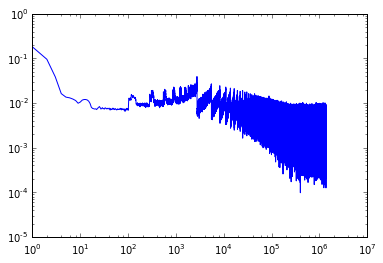

In [30]:
plt.plot(error)
plt.loglog()

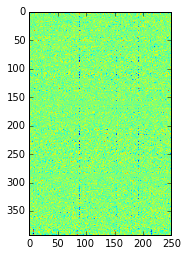

In [31]:
plt.imshow(rbm._weights, interpolation='nearest')

In [32]:
pd.DataFrame(rbm._weights, index=recipes.columns)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
almond,-0.100757,-0.204656,-0.188387,0.852782,1.132839,0.087167,-0.061509,0.967530,-0.441861,-0.207527,...,-0.394317,-0.835845,0.217880,-0.176963,-0.336649,0.089135,-2.097298,-1.218485,0.415480,0.197762
angelica,0.031854,-0.008744,0.006696,-0.200795,0.015622,-0.213544,-0.216821,-0.160512,-0.108353,-0.052601,...,0.019697,-0.145177,0.128876,-0.073450,-0.312099,-0.016656,-0.223129,-0.198031,-0.119147,-0.090634
anise,-0.771693,0.032639,-0.246878,0.068669,0.449835,-0.535646,-0.429872,0.791362,-0.768720,-0.263687,...,-1.109446,0.027250,0.336328,0.152303,-0.254182,0.145072,0.656887,-0.597355,0.205146,0.004019
anise seed,0.327210,-0.369158,-0.019640,-0.597407,0.046730,0.131990,-0.220040,0.365714,-0.366382,-0.730890,...,-0.051743,-0.533888,-0.207367,0.915415,0.173179,0.601200,-0.413708,-0.512610,0.110894,-0.860949
apple,0.230710,0.169004,0.504121,0.635019,-1.080326,0.325855,-0.589874,-0.320812,0.709933,-1.100697,...,0.123255,0.559034,-0.054356,-1.430582,-0.177334,0.154915,-1.167320,-0.902891,-0.015256,0.839602
apple brandy,0.042775,-0.188260,-0.032244,0.647081,0.024615,0.437575,-0.295124,-0.113109,0.697635,-0.433000,...,-0.216836,-0.086333,0.244081,-0.281730,-0.780120,0.315070,-0.156346,-0.276151,-0.013717,0.313201
armagnac,-0.138447,-0.387111,-0.427469,-0.303378,-0.151274,-0.701526,0.382369,0.571400,-0.080116,-0.259980,...,-0.376586,-0.832007,-0.230280,0.362429,-0.212075,0.029499,-0.757373,-0.101221,-0.261584,-0.332479
apricot,0.028149,-0.054350,-0.682592,-0.256395,0.246130,0.015856,0.095323,0.255103,-0.492724,-0.548224,...,-0.000897,0.158371,0.215568,-0.308996,-0.648405,0.186356,-0.427950,-0.268555,-0.367716,-0.388400
artemisia,-0.372546,-0.361482,-0.267794,-0.470480,0.014078,-0.201109,0.024379,-0.535183,-0.143219,-0.151538,...,0.142381,0.005037,-0.536702,-0.684684,-0.014812,0.305863,-0.103892,-0.360796,-0.143286,-0.099570
artichoke,-0.333574,-0.554631,0.062134,0.168600,-0.222866,0.235303,0.307285,-0.146036,0.795627,-0.047427,...,0.828279,0.017027,-0.235617,-0.121796,-1.871003,-0.317176,0.048629,0.897775,-0.028427,0.217986


In [10]:
rbm.recommend_ingredients(['yogurt', 'cucumber', 'mint'], top_size=10)

[(0.0018834561164923563, 'melon', 'fruit'),
 (0.00056548871447040662, 'watermelon', 'fruit'),
 (0.00019081268241766399, 'kiwi', 'fruit'),
 (0.00018978344601508035, 'lamb', 'meat'),
 (0.00014142473832182259, 'mango', 'fruit'),
 (0.00014020248753923348, 'peppermint', 'herb'),
 (0.00012768036180797916, 'lime juice', 'fruit'),
 (0.0001233792811318147, 'grapefruit', 'fruit'),
 (0.00010885555692909277, 'gin', 'alcoholic beverage'),
 (9.9234582030589176e-05, 'champagne wine', 'alcoholic beverage')]

ERROR! Session/line number was not unique in database. History logging moved to new session 1470


In [14]:
rbm.recommend_ingredients(['meat', 'tomato', 'onion'], top_size=10, category='spice')

[(2.3738675802334614e-05, 'cayenne', 'spice'),
 (1.484295333878655e-05, 'sumac', 'spice'),
 (1.3905377789900923e-05, 'star anise', 'spice'),
 (9.1133625713326499e-06, 'tabasco pepper', 'spice'),
 (5.1324033823236352e-06, 'pepper', 'spice'),
 (4.8567782221817951e-06, 'coriander', 'spice'),
 (3.6862019075907172e-06, 'cumin', 'spice'),
 (2.9699482063252711e-06, 'cinnamon', 'spice'),
 (2.6209147202632339e-06, 'black pepper', 'spice'),
 (1.8589125531826284e-06, 'saffron', 'spice')]

In [34]:
rbm.recommend_ingredients(['bean', 'beef', 'potato'], top_size=10, category='alcoholic beverage')

[(5.2375204155270264e-05, 'beer', 'alcoholic beverage'),
 (5.0095879198233077e-05, 'champagne wine', 'alcoholic beverage'),
 (1.40521739035766e-05, 'blackberry brandy', 'alcoholic beverage'),
 (1.2233764920096476e-05, 'gin', 'alcoholic beverage'),
 (8.936216666886144e-06, 'port wine', 'alcoholic beverage'),
 (8.7473080170465604e-06, 'jamaican rum', 'alcoholic beverage'),
 (3.8748595093738282e-06, 'cabernet sauvignon wine', 'alcoholic beverage'),
 (3.6176628635718427e-06, 'armagnac', 'alcoholic beverage'),
 (2.9662713549300379e-06, 'wine', 'alcoholic beverage'),
 (2.5098490963433057e-06, 'sherry', 'alcoholic beverage')]

In [35]:
rbm.recommend_ingredients(['bean', 'beef', 'potato'], top_size=10, region='SouthAsian')

[(0.00096870832365682257, 'kale', 'vegetable'),
 (0.0004412590798112564, 'kidney bean', 'vegetable'),
 (0.00030571254127954335, 'cilantro', 'herb'),
 (0.00020064498016181164, 'meat', 'meat'),
 (0.00018094903630306132, 'lima bean', 'vegetable'),
 (0.00017615121807167542, 'cauliflower', 'vegetable'),
 (0.00016117027485499697, 'watercress', 'vegetable'),
 (0.00016112873075340957, 'tomato juice', 'vegetable'),
 (0.00014470781441213896, 'tea', 'plant derivative'),
 (0.00013807868775639556, 'champagne wine', 'alcoholic beverage')]

In [36]:
cPickle.dump(rbm, open('recipe_rbm.cpkl', 'w'))

In [5]:
rbm = cPickle.load(open('recipe_rbm.cpkl', 'r'))

In [6]:
rbm.n_hidden

250

In [9]:
hinton(rbm._weights)
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

In [8]:
%debug

ERROR! Session/line number was not unique in database. History logging moved to new session 1468
> <ipython-input-2-563067f2bf93>(1)<module>()
----> 1 from RestrictedBoltzmanMachine import RestrictedBoltzmanMachine, sigmoid
      2 import matplotlib.pyplot as plt
      3 import pandas as pd

ipdb> q
